In [1]:
import torch
import torchvision
import PIL
import numpy as np
import cppn

import matplotlib.pyplot as plt
import montage

%matplotlib inline
%load_ext autoreload

%autoreload 2

In [2]:
model = cppn.CPPN(4, 24)
print(model)

CPPN(
  (inputLayer): Conv2d(2, 24, kernel_size=(1, 1), stride=(1, 1))
  (innerLayer): ModuleList(
    (0): Conv2d(48, 24, kernel_size=(1, 1), stride=(1, 1))
    (1): Conv2d(48, 24, kernel_size=(1, 1), stride=(1, 1))
    (2): Conv2d(48, 24, kernel_size=(1, 1), stride=(1, 1))
    (3): Conv2d(48, 24, kernel_size=(1, 1), stride=(1, 1))
  )
  (outputLayer): Conv2d(48, 3, kernel_size=(1, 1), stride=(1, 1))
)


In [3]:
r = np.sqrt(3)
im_width = 224
coords = np.linspace(-r, r, im_width)
grid = np.meshgrid(coords, coords)
input_grid = torch.Tensor(np.dstack(grid)).permute(2, 1, 0).unsqueeze(0)

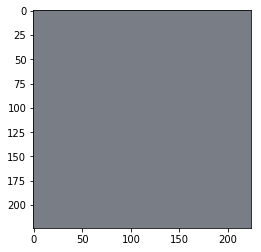

In [4]:
out = model(input_grid)
montage.show(255*out)

Target shape = torch.Size([1, 3, 224, 224])


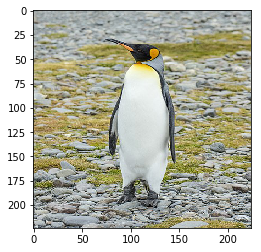

In [5]:
filename = 'penguin.jpg'
im_size = (im_width, im_width)
target = montage.load_image(filename, im_size) # (w,h)
target = target/255
print(f"Target shape = {target.size()}")
montage.show(255*target)

In [6]:
mse = torch.nn.MSELoss()
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
steps = 10
for i in range(steps):
    optimiser.zero_grad()
    out = model(input_grid)
    loss = mse(out, target)
    if i % (steps/10) == 0:
        print(loss)
    loss.backward()
    optimiser.step()

tensor(0.0515, grad_fn=<MseLossBackward>)
tensor(0.0440, grad_fn=<MseLossBackward>)
tensor(0.0369, grad_fn=<MseLossBackward>)
tensor(0.0344, grad_fn=<MseLossBackward>)
tensor(0.0325, grad_fn=<MseLossBackward>)
tensor(0.0313, grad_fn=<MseLossBackward>)
tensor(0.0301, grad_fn=<MseLossBackward>)
tensor(0.0294, grad_fn=<MseLossBackward>)
tensor(0.0284, grad_fn=<MseLossBackward>)
tensor(0.0279, grad_fn=<MseLossBackward>)


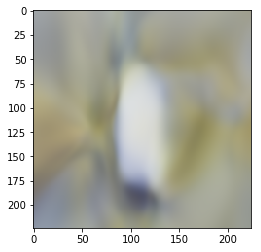

In [7]:
montage.show(255*out)

In [17]:
from torchvision import models
model = models.vgg16(pretrained=True)
model.eval()
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [9]:
import objectives
    
def denormalise(in_tensor):
    mean = torch.as_tensor([0.485, 0.456, 0.406])
    std = torch.as_tensor([0.229, 0.224, 0.225])
    return in_tensor * std[None,:,None,None] + mean[None,:,None,None]
 
def normalise(in_tensor):
    mean = torch.as_tensor([0.485, 0.456, 0.406])
    std = torch.as_tensor([0.229, 0.224, 0.225])
    return (in_tensor - mean[None,:,None,None]) / std[None,:,None,None]
 

channel = objectives.ConvChannel(model.features[8], 0)
linear = objectives.Linear(model.classifier[6], 0)
cppn_image = cppn.CPPN(4, 24)


optimiser = torch.optim.Adam(cppn_image.parameters(), lr=0.01)
steps = 50
for i in range(steps):
    optimiser.zero_grad()
    out_image = cppn_image(input_grid)
    out = model(normalise(out_image))
    
    loss = -channel.objective + linear.objective
    if i % (steps/10) == 0:
        print(loss)
    loss.backward()
    optimiser.step()


montage.show(255*cppn_image(input_grid))

tensor(0.6135, grad_fn=<AddBackward0>)
tensor(-2.1706, grad_fn=<AddBackward0>)
tensor(-4.4758, grad_fn=<AddBackward0>)
tensor(-7.0391, grad_fn=<AddBackward0>)
tensor(-8.9319, grad_fn=<AddBackward0>)
tensor(-10.0050, grad_fn=<AddBackward0>)
tensor(-10.8725, grad_fn=<AddBackward0>)


KeyboardInterrupt: 

tensor(0.7036, grad_fn=<NegBackward>)
tensor(-32.2970, grad_fn=<NegBackward>)
tensor(-106.4022, grad_fn=<NegBackward>)
tensor(-192.9704, grad_fn=<NegBackward>)
tensor(-235.8189, grad_fn=<NegBackward>)
tensor(-355.0305, grad_fn=<NegBackward>)
tensor(-387.7351, grad_fn=<NegBackward>)
tensor(-434.5423, grad_fn=<NegBackward>)
tensor(-567.9634, grad_fn=<NegBackward>)
tensor(-676.6459, grad_fn=<NegBackward>)


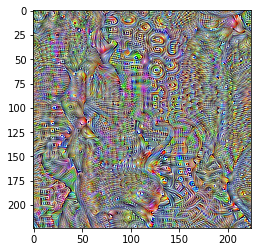

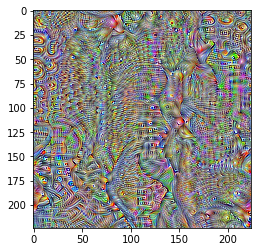

In [27]:
channel = objectives.ConvChannel(model.features[10], 0, func=torch.mean)
linear = objectives.Linear(model.classifier[6], 0)

class LearnableImage(torch.nn.Module):
    def __init__(self, size):
        super(LearnableImage, self).__init__()
        self.pixels = torch.nn.Parameter(0*torch.randn(1,3,size,size))
        
    def forward(self):
        return torch.sigmoid(self.pixels)

image = LearnableImage(224)
optimiser = torch.optim.Adam(image.parameters(), lr=0.05)
steps = 100
jitter = 8
for i in range(steps):
    optimiser.zero_grad()
    input_image = image()
    input_image = torch.roll(input_image, 
                             np.random.randint(-jitter, jitter), 
                             dims=2)
    input_image = torch.roll(input_image, 
                             np.random.randint(-jitter, jitter), 
                             dims=3)
    
    out = model(normalise(input_image))
    
    loss = -linear.objective
    if i % (steps/10) == 0:
        print(loss)
    loss.backward()
    optimiser.step()


montage.show(255*image())

In [ ]:
montage.show(1e4*image.pixels.grad)

In [ ]:
plt.hist(np.ravel(image.pixels.grad.numpy()))

In [55]:
filename = 'penguin.jpg'
im_size = (im_width, im_width)
target = montage.load_image(filename, im_size) # (w,h)
target = target/255


#channel = objectives.ConvChannel(model.features[10], 0, func=torch.mean)
#linear = objectives.Linear(model.classifier[6], 0)

out = model(normalise(target))
channel_target = channel.values.detach()

image = LearnableImage(224)
print(target)

tensor([[[[0.6275, 0.6431, 0.7098,  ..., 0.4667, 0.4078, 0.4078],
          [0.5882, 0.6078, 0.6745,  ..., 0.3020, 0.5451, 0.5608],
          [0.5608, 0.6157, 0.6549,  ..., 0.4471, 0.8118, 0.4706],
          ...,
          [0.6275, 0.6706, 0.6588,  ..., 0.2196, 0.7490, 0.5725],
          [0.5529, 0.6549, 0.6275,  ..., 0.3098, 0.7137, 0.4980],
          [0.5451, 0.6275, 0.5686,  ..., 0.0000, 0.7020, 0.5725]],

         [[0.6745, 0.6745, 0.7255,  ..., 0.4824, 0.4353, 0.4471],
          [0.6353, 0.6431, 0.6902,  ..., 0.3176, 0.5725, 0.6000],
          [0.6000, 0.6510, 0.6784,  ..., 0.4667, 0.8510, 0.5137],
          ...,
          [0.6706, 0.7098, 0.7020,  ..., 0.2627, 0.7647, 0.5765],
          [0.5882, 0.6941, 0.6706,  ..., 0.3608, 0.7333, 0.5059],
          [0.5804, 0.6667, 0.6118,  ..., 0.0157, 0.7373, 0.5843]],

         [[0.6745, 0.6824, 0.7294,  ..., 0.4941, 0.4588, 0.4863],
          [0.6353, 0.6392, 0.6941,  ..., 0.3294, 0.5961, 0.6353],
          [0.5961, 0.6471, 0.6784,  ..., 0

tensor(0.2466, grad_fn=<MulBackward0>)
tensor(0.2650, grad_fn=<MulBackward0>)
tensor(0.1792, grad_fn=<MulBackward0>)
tensor(0.1422, grad_fn=<MulBackward0>)
tensor(0.1207, grad_fn=<MulBackward0>)
tensor(0.1080, grad_fn=<MulBackward0>)
tensor(0.0982, grad_fn=<MulBackward0>)
tensor(0.0897, grad_fn=<MulBackward0>)
tensor(0.0820, grad_fn=<MulBackward0>)
tensor(0.0753, grad_fn=<MulBackward0>)


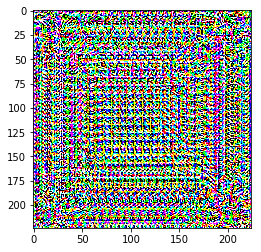

In [56]:
optimiser = torch.optim.Adam(image.parameters(), lr=1e0)
style = objectives.Style(model.features[22], model, target)
#optimiser = torch.optim.SGD(image.parameters(), lr=0.1)
steps = 100
for i in range(steps):
    optimiser.zero_grad()
    input_image = image()
    out = model(normalise(input_image))
    
    loss = 1000000*style.objective
    if i % (steps/10) == 0:
        print(loss)
    loss.backward()
    optimiser.step()


montage.show(255*image())

In [38]:
loss.backward()

RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.